# HW1
### Author: Guanfu Liu
### Date: 01/20/19

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(999)

# Q1

From the QQ plot, we can see that with $n=100$, normal random numbers generated via **np.random.rand** are very close to real normal distribution. However, "poor man's generator" performs poorly as the QQ plot deviates significantly from $y = x$ on two ends of the quantile.


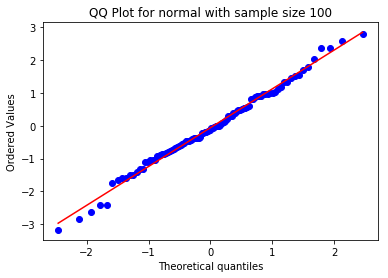

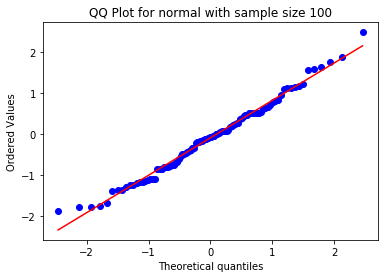

In [4]:
# q1
def normal_qq_plot(n, normal_f):
    rand_nums = normal_f(n)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = stats.probplot(rand_nums, plot=ax)
    ax.set_title("QQ Plot for normal with sample size {}".format(n))


def poor_man_normal(n):
    unif_nums = np.random.rand(n, 12)
    return unif_nums.sum(1) - 6.0


normal_qq_plot(100, np.random.randn)
normal_qq_plot(100, poor_man_normal)

# Q2
We simulate $n=10000$ different stock prices at maturity and compute the payoff of the straddle given by $PayOff = |S_T - K|$. 
Price of the straddle is given by $P = e^{-rT} * 1/n * \sum PayOff_i = 4.646$ and standard deviation is given by $e^{-rT} * sdv(PayOff_i) / \sqrt{n} = 0.0286$.

In [6]:
# q2
def sim_straddle(n, S0, K, sigma, r, T):
    sim_S_T = S0 * np.exp((r - sigma**2/2) * T + sigma * sigma**(1/2) * np.random.randn(n))
    sim_disc_pay_off = np.abs(sim_S_T - K) * np.exp(-r * T)
    return sim_disc_pay_off.mean(), sim_disc_pay_off.std() / n**.5

sim_straddle(10000, 100, 100, .1, .05, 1)

(4.645561394355063, 0.028563921482991143)

# Q3
We perform the following experiment 100 times: simulate $n=10000$ paths of $N=52$ weekly stock price and compute the $Corr(S_T, A)$ and $Corr(S_T, (A-K)^+)$. With 100 such observations, we can estimate the standard deviation.

The estimated $Corr(S_T, A) = 0.871$ with $sdv = 0.000232$ while the estimated $Corr(S_T, (A-K)^+) = 0.816$ with $sdv = 0.0003$.

In [12]:
# q3
def sim_corr_asian_option(num_experiment, n, N, S0, K, sigma, r, T):
    corr_output_1 = np.zeros(num_experiment)
    corr_output_2 = np.zeros(num_experiment)    

    delta_t = T / N
    for i in range(num_experiment):
        rand_nums = np.random.randn(n, N)
        exp_increment = (r - sigma**2/2) * delta_t * np.ones((n, N)) + rand_nums * sigma * delta_t**.5
        exp_cum_sum = np.cumsum(exp_increment, axis=1)
        sim_S_path = S0 * np.exp(exp_cum_sum)
        A = sim_S_path.mean(axis=1)
        corr_output_1[i] = np.corrcoef(A, sim_S_path[:, -1])[0, 1]
        corr_output_2[i] = np.corrcoef(np.maximum(A - K, 0), sim_S_path[:, -1])[0, 1]
    print("Corr(S_T, A), sdv: {}, {}".format(corr_output_1.mean(), corr_output_1.std() / num_experiment**.5))
    print("Corr(S_T, (A-K)+), sdv: {}, {}".format(corr_output_2.mean(), corr_output_2.std() / num_experiment**.5))

sim_corr_asian_option(100, 10000, 52, 100, 100, .1, .05, 1)

Corr(S_T, A), sdv: 0.871482544349338, 0.00023182912579988645
Corr(S_T, (A-K)+), sdv: 0.815622860771371, 0.00030043264133655797
